# Credit Card Fraud Detection(Aditya Chowdhury)

In this project the task in hand is to predict fraudulent credit card transactions

I have used 6 machine learning algorithms and then compared the results using the 
evaluation metrics between to determine which algorithm gives the best predictions.


The 6 classification algorithms used are 
Random Forest,Decision Tree,Logistic Regression, Support Vector Machine(SVM), K-Nearest Neighbor(KNN)   & Naive Bayes(Gaussian)

In [1]:
#Importing necessary libraries and loading the dataframe
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline
credit=pd.read_csv('creditcard.csv')
credit.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Data description

In [2]:
print(credit.shape)
credit.describe()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Data detailed information

In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Checking Null values

In [4]:
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Checking missing values

<AxesSubplot:>

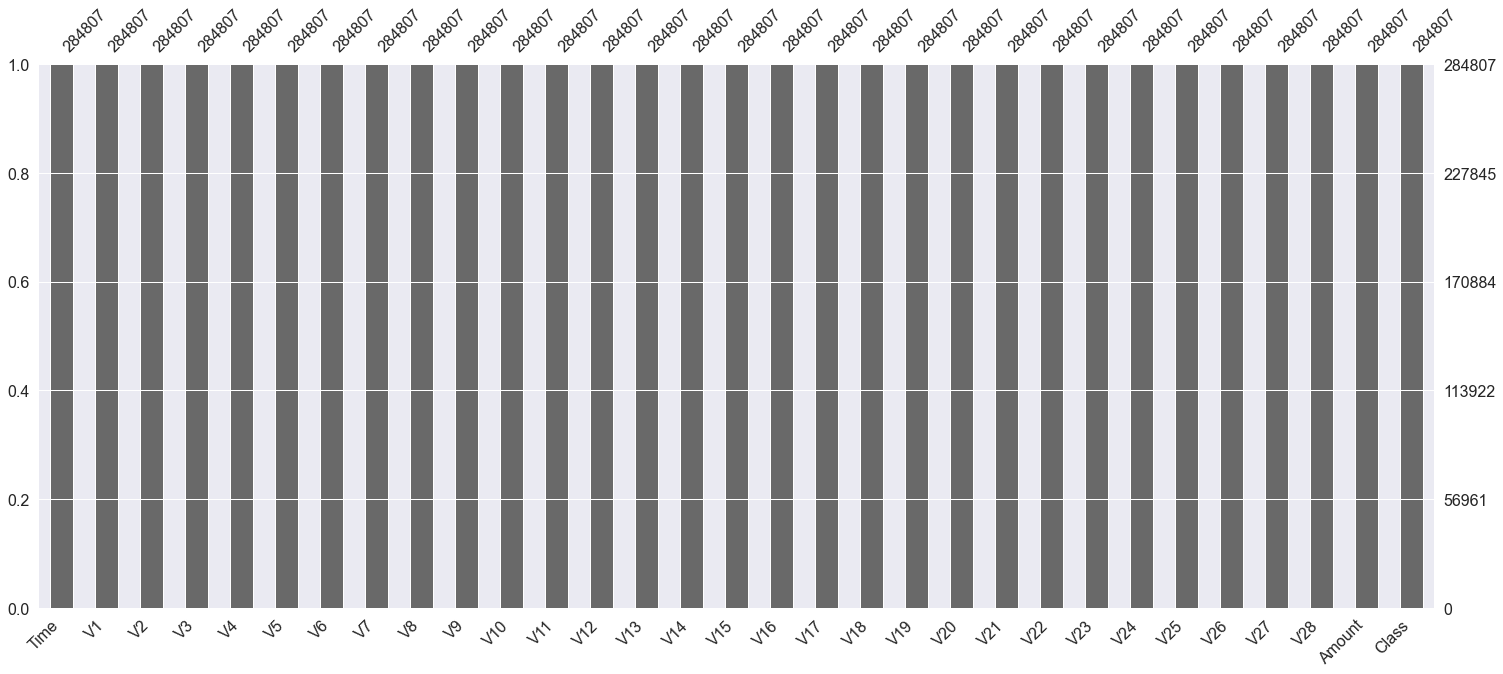

In [5]:
msno.bar(credit)

Checking duplicate values

In [6]:
credit[credit.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


Dropping duplicate values

In [7]:
credit.drop_duplicates(inplace=True)
credit[credit.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


Checking for Outliers

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


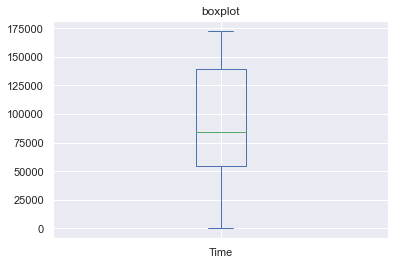

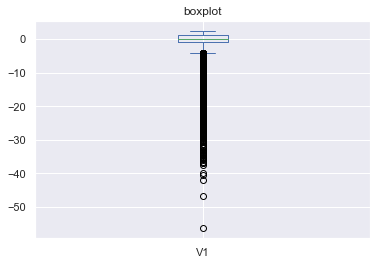

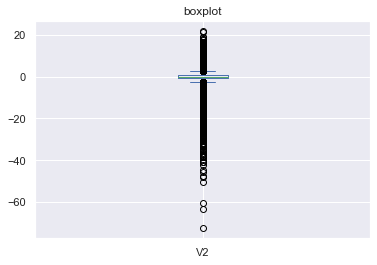

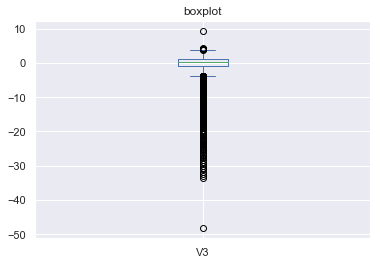

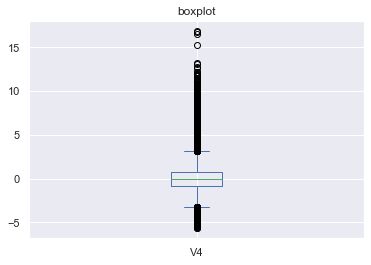

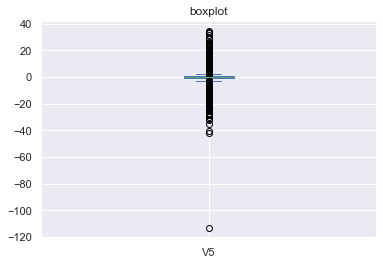

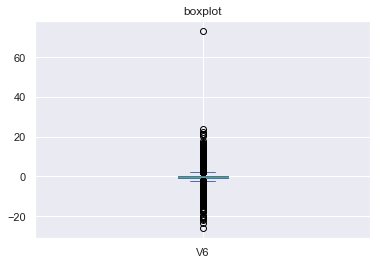

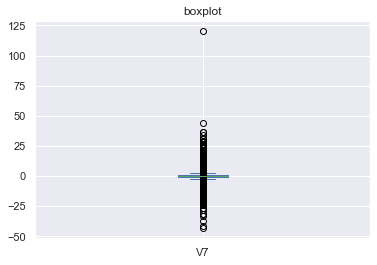

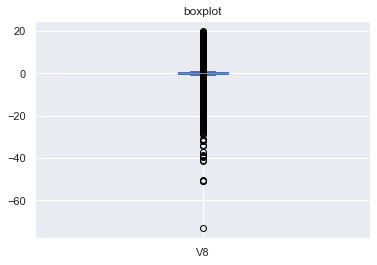

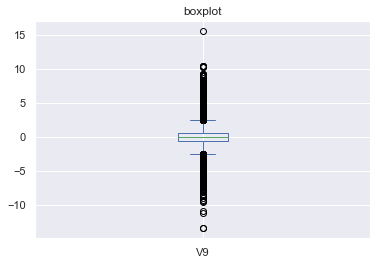

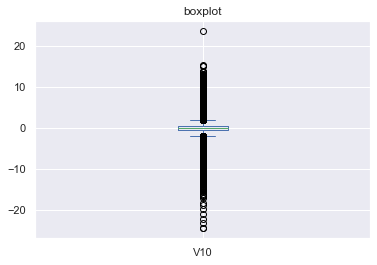

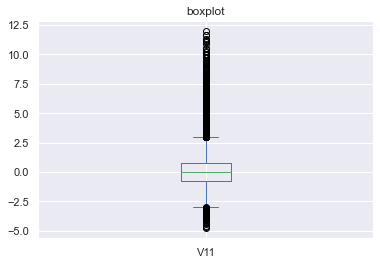

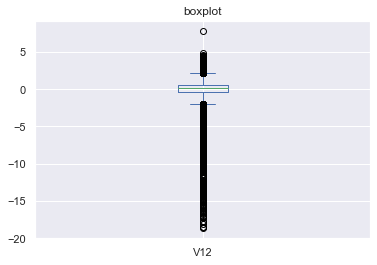

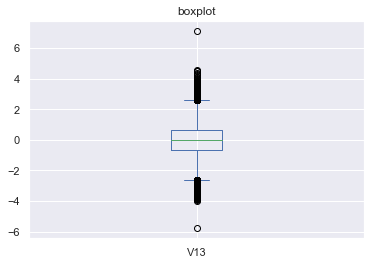

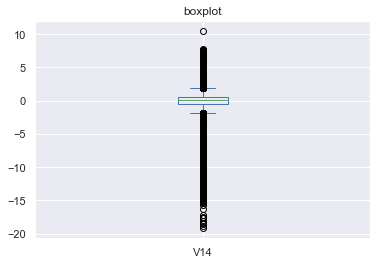

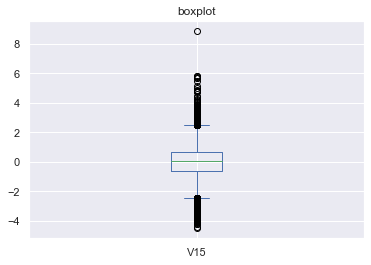

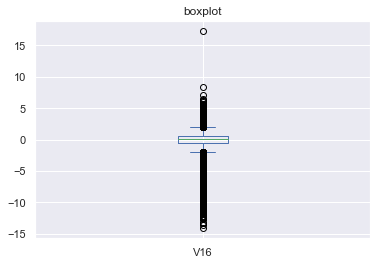

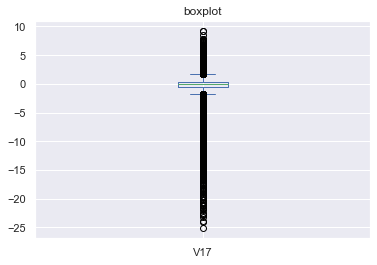

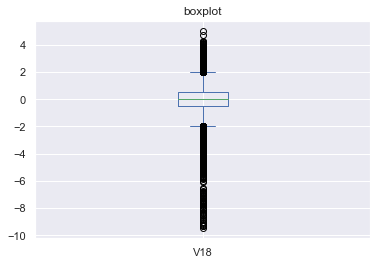

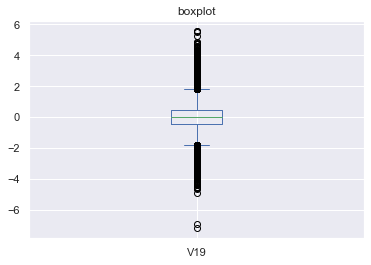

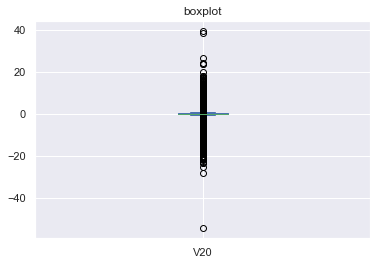

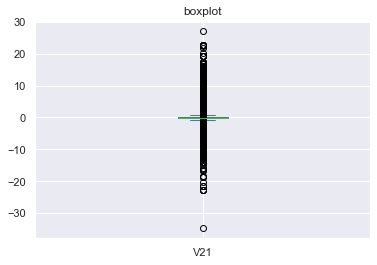

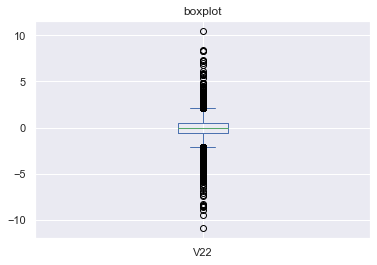

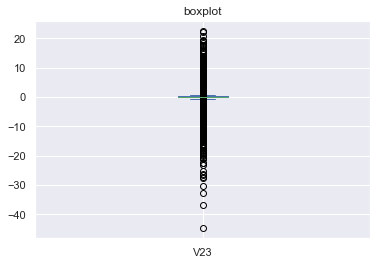

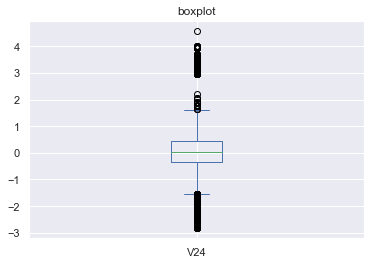

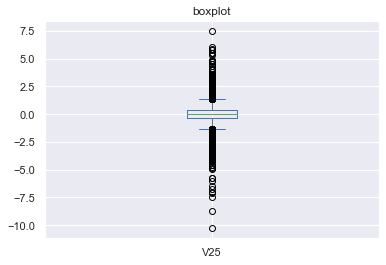

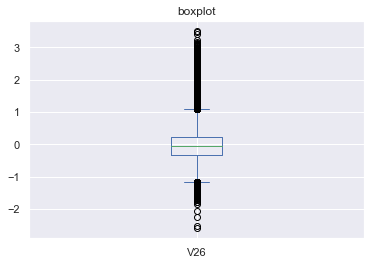

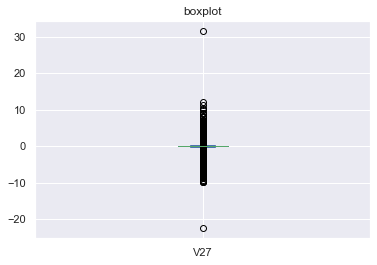

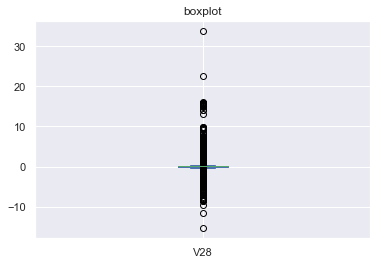

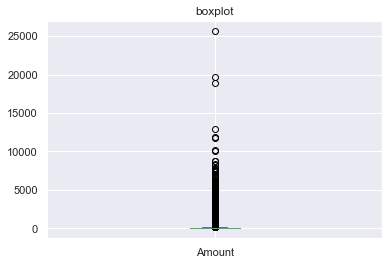

In [8]:
df=credit.drop(columns=['Class'])
cols = list(df.columns)
print(cols)
for col in cols:
    a=credit[col].plot(kind='box',title='boxplot')
    plt.show()

Outlier Treatment

In [9]:

for col in cols:
    Q1=credit[col].quantile(.25)
    Q3=credit[col].quantile(.75)
    IQR=Q3-Q1
    lower=Q1-(1.5*IQR)
    upper=Q3+(1.5*IQR)
    credit[col]=np.where(credit[col]>upper,upper,np.where(credit[col]<lower,lower,credit[col]))
    


Outliers Removed

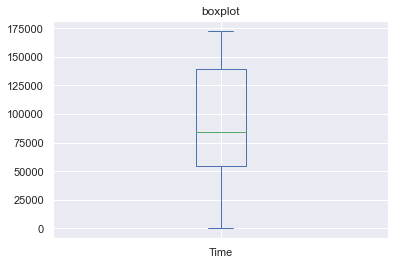

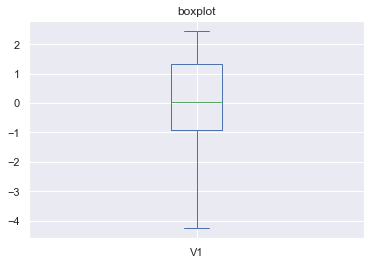

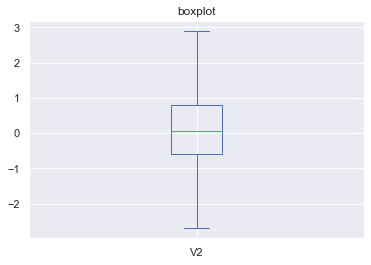

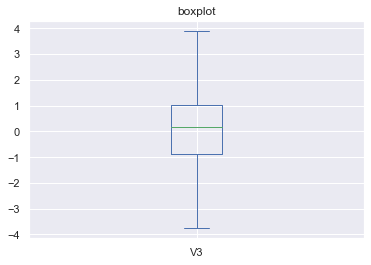

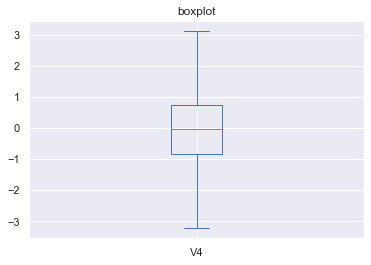

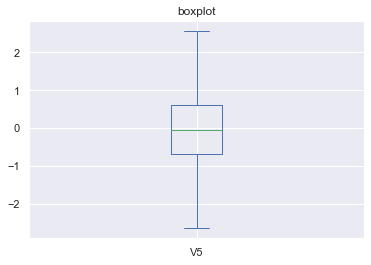

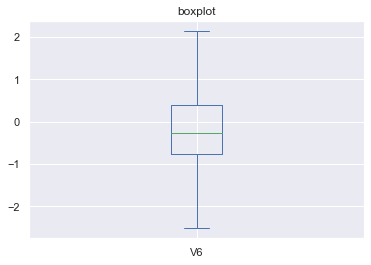

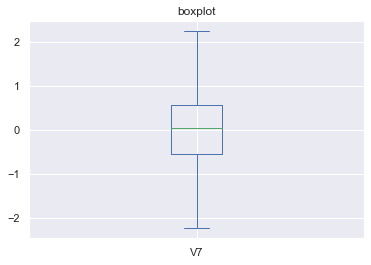

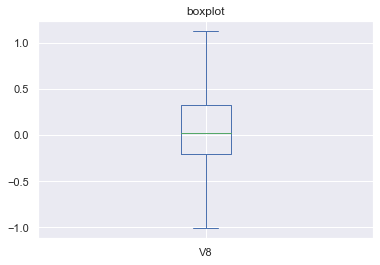

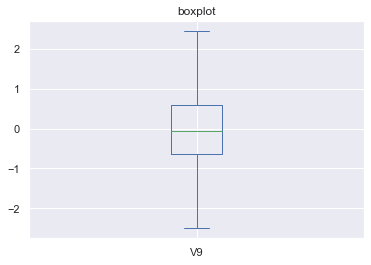

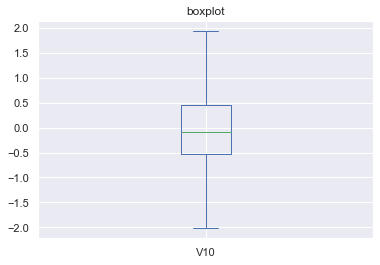

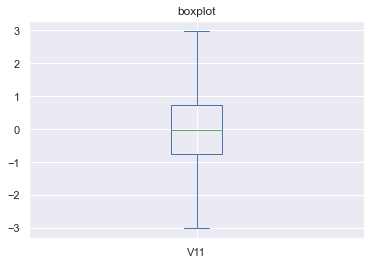

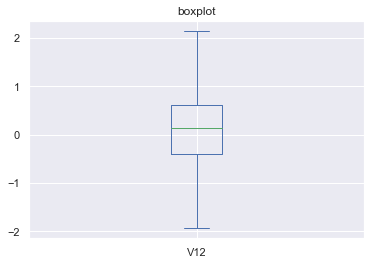

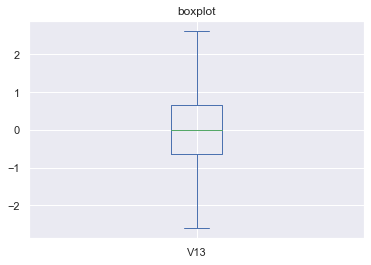

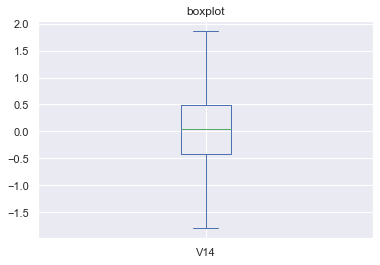

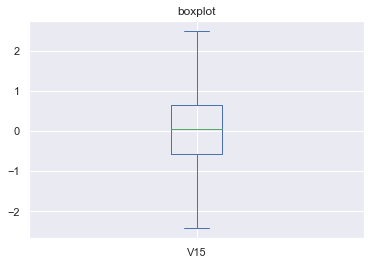

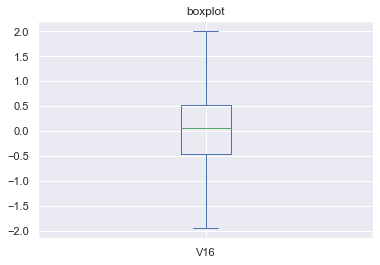

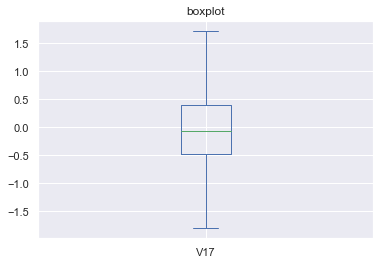

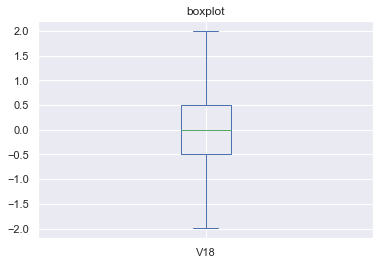

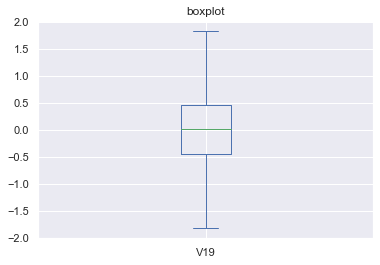

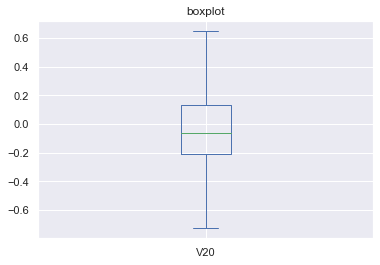

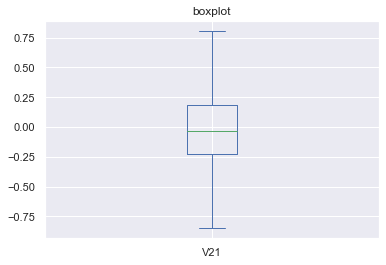

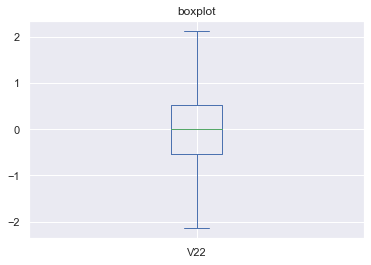

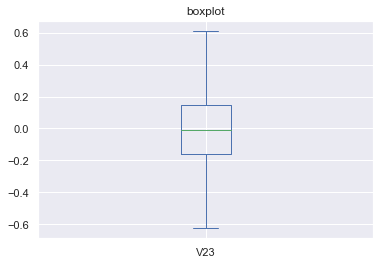

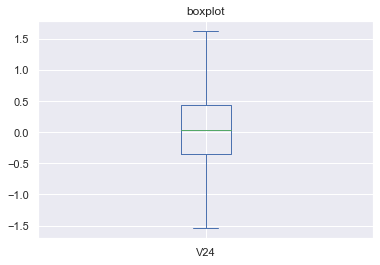

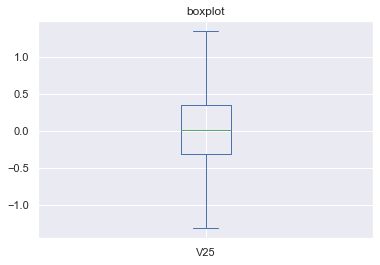

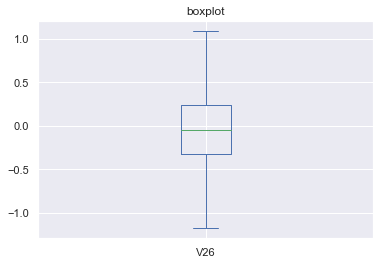

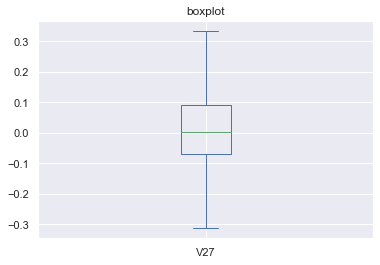

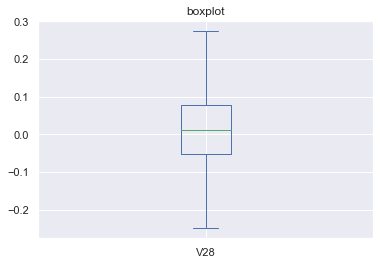

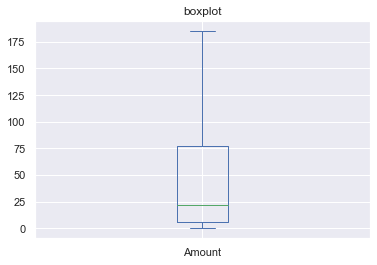

In [10]:
for col in cols:
    a=credit[col].plot(kind='box',title='boxplot')
    plt.show()

Checking Number and Percentage of fraud transactions

In [11]:
fraud=credit[credit['Class']==1]
not_fraud=credit[credit['Class']==0]
per_pos=(len(fraud)/len(credit))*100
print('Total number of fraud transactions:',len(fraud))
print('Total number of normal transactions:',len(not_fraud))
print('Percenage of fraud transactions:',per_pos,'%')

Total number of fraud transactions: 473
Total number of normal transactions: 283253
Percenage of fraud transactions: 0.1667101358352777 %


Plotting count of fraud and normal transactions

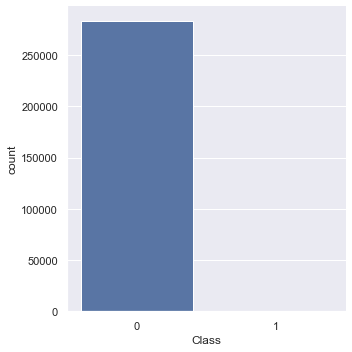

In [12]:
sns.catplot(x='Class',kind='count',data=credit)
plt.show()

Time vs Amount

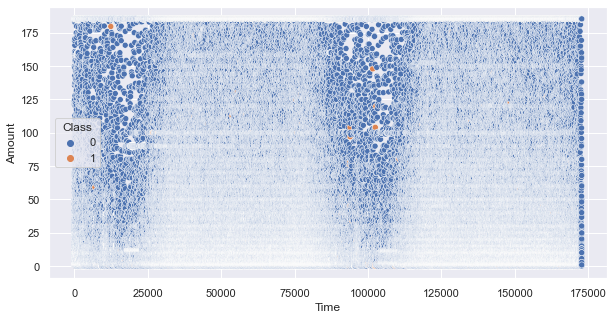

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Time',y='Amount',hue='Class',data=credit)
plt.show()

Data distribution for various columns

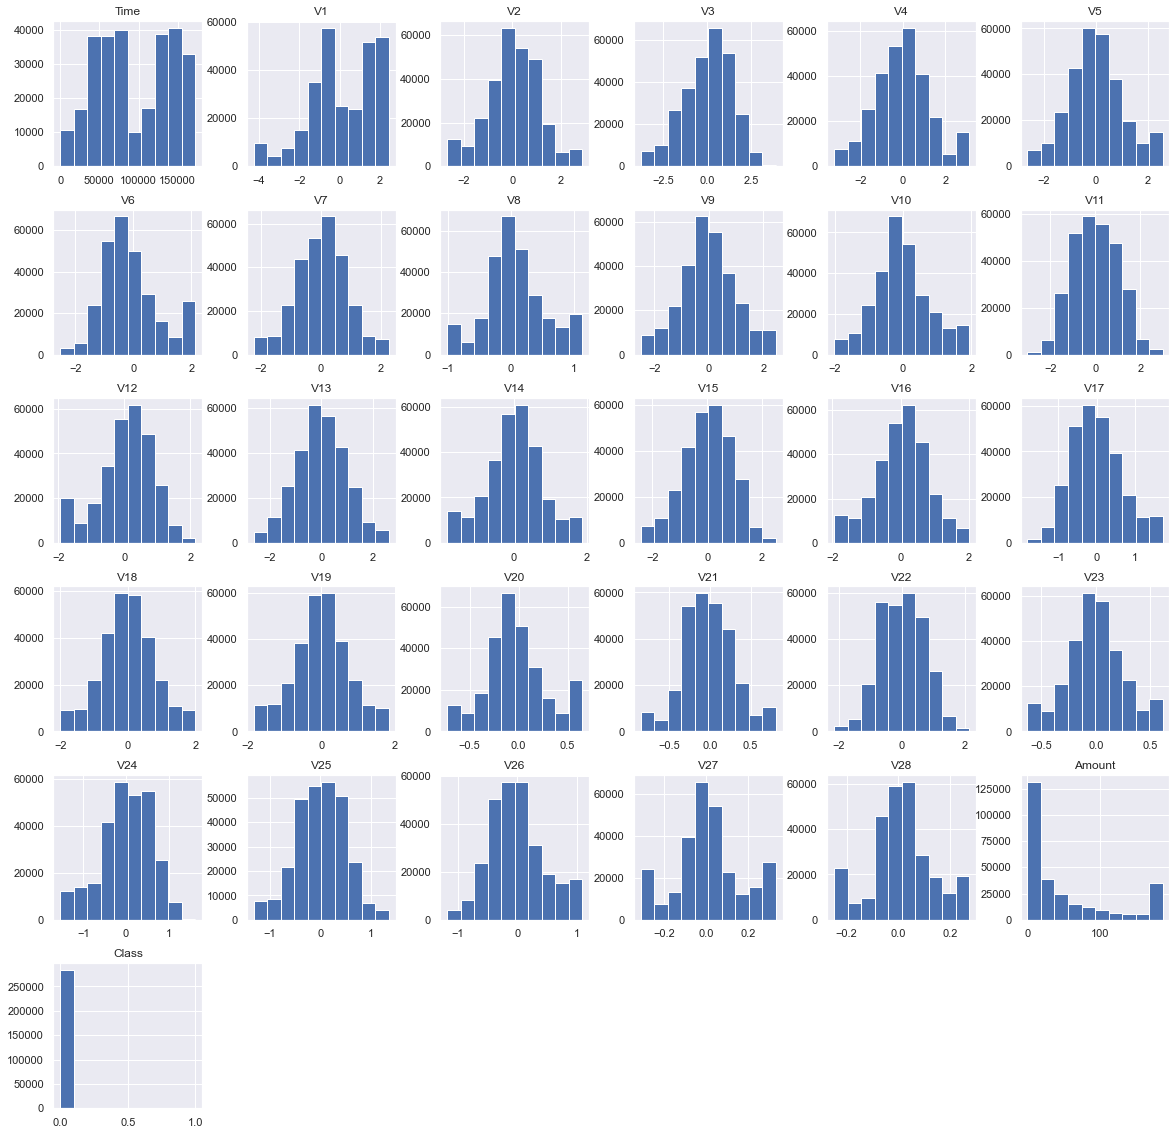

In [14]:
credit.hist(figsize=(20,20))
plt.show()

Listing the amounts for fraud transactions

In [15]:
fraud[['Amount']]

,Amount
541,0.000
623,185.375
4920,185.375
6108,59.000
6329,1.000
...,...
279863,185.375
280143,0.760
280149,77.890
281144,185.375


Listing the amounts details for fraud transactions

In [16]:
fraud['Amount'].describe()

count    473.000000
mean      58.960159
std       72.763473
min        0.000000
25%        1.000000
50%        9.820000
75%      105.890000
max      185.375000
Name: Amount, dtype: float64

Listing the amounts details for normal transactions

In [17]:
not_fraud['Amount'].describe()

count    283253.000000
mean         51.881399
std          61.893689
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max         185.375000
Name: Amount, dtype: float64

Heat map to visualize correlation

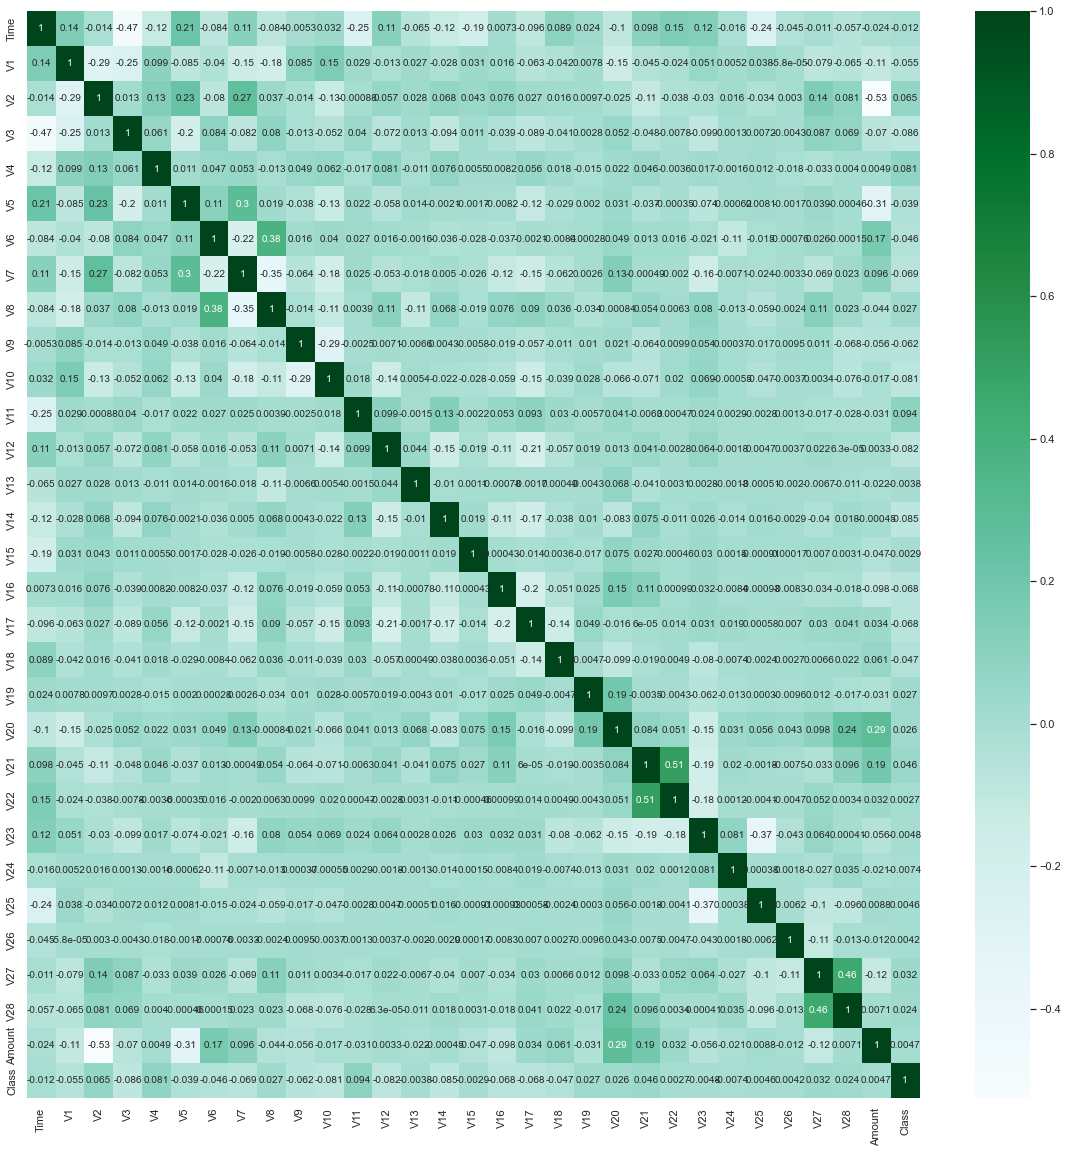

In [18]:

plt.figure(figsize=(20,20))
sns.heatmap(credit.corr(),cbar=True,cmap='BuGn',annot=True)
plt.show()

Splitting the dataset 

In [19]:
x=credit.drop(['Class'],axis=1)
y=credit['Class']
print(x.shape,y.shape)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

(283726, 30) (283726,)


Data Standardization

In [20]:
scaler=StandardScaler()
standardized_x_train=pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
standardized_x_test=pd.DataFrame(scaler.fit_transform(x_test),columns=x_test.columns)
print(standardized_x_train.shape)
print(y_train.shape)
print(standardized_x_test.shape)
print(y_test.shape)

(226980, 30)
(226980,)
(56746, 30)
(56746,)


 Random Forest 

Accuracy score : 0.9994713283755683
F1 score 0.8051948051948051
Recall: 0.6888888888888889
Precision: 0.96875


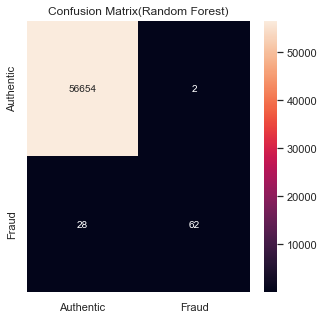

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(standardized_x_train,y_train)
prediction=rfc.predict(standardized_x_test)

from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score
acc_rfc=accuracy_score(y_test,prediction)
print('Accuracy score :',acc_rfc)
f1_score_rfc=f1_score(y_test,prediction)
print('F1 score',f1_score_rfc)
recall_rfc=recall_score(y_test,prediction)
print('Recall:',recall_rfc)
precision_rfc=precision_score(y_test,prediction)
print('Precision:',precision_rfc)
labels=['Authentic','Fraud']
plt.figure(figsize=(5,5))
plt.title("Confusion Matrix(Random Forest)")
sns.heatmap(confusion_matrix(y_test,prediction),xticklabels=labels,yticklabels=labels,annot=True,fmt='d')
plt.show()

Decision Tree

Accuracy score : 0.9990131463010609
F1 score 0.6781609195402298
Recall: 0.6555555555555556
Precision: 0.7023809523809523


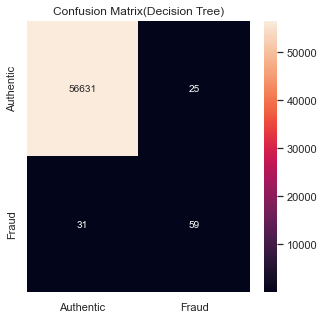

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(standardized_x_train,y_train)
prediction=dtc.predict(standardized_x_test)


from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score
acc_dt=accuracy_score(y_test,prediction)
print('Accuracy score :',acc_dt)
f1_score_dt=f1_score(y_test,prediction)
print('F1 score',f1_score_dt)
recall_dt=recall_score(y_test,prediction)
print('Recall:',recall_dt)
precision_dt=precision_score(y_test,prediction)
print('Precision:',precision_dt)
labels=['Authentic','Fraud']
plt.figure(figsize=(5,5))
plt.title("Confusion Matrix(Decision Tree)")
sns.heatmap(confusion_matrix(y_test,prediction),xticklabels=labels,yticklabels=labels,annot=True,fmt='d')
plt.show()

Logistic Regression

Accuracy score : 0.9994360836006062
F1 score 0.802469135802469
Recall: 0.7222222222222222
Precision: 0.9027777777777778


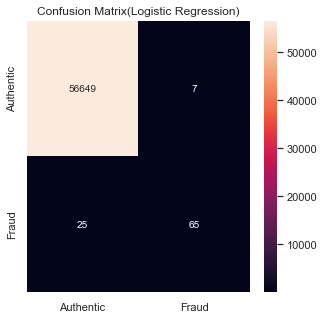

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(standardized_x_train,y_train)
prediction=lr.predict(standardized_x_test)


from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score
acc_lr=accuracy_score(y_test,prediction)
print('Accuracy score :',acc_lr)
f1_score_lr=f1_score(y_test,prediction)
print('F1 score',f1_score_lr)
recall_lr=recall_score(y_test,prediction)
print('Recall:',recall_lr)
precision_lr=precision_score(y_test,prediction)
print('Precision:',precision_lr)
labels=['Authentic','Fraud']
plt.figure(figsize=(5,5))
plt.title("Confusion Matrix(Logistic Regression)")
sns.heatmap(confusion_matrix(y_test,prediction),xticklabels=labels,yticklabels=labels,annot=True,fmt='d')
plt.show()

Support Vector Machine(SVM)

Accuracy score : 0.9995065731505305
F1 score 0.8227848101265822
Recall: 0.7222222222222222
Precision: 0.9558823529411765


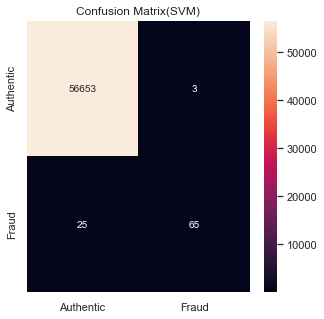

In [25]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(standardized_x_train,y_train)
prediction=svm.predict(standardized_x_test)


from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score
acc_svm=accuracy_score(y_test,prediction)
print('Accuracy score :',acc_svm)
f1_score_svm=f1_score(y_test,prediction)
print('F1 score',f1_score_svm)
recall_svm=recall_score(y_test,prediction)
print('Recall:',recall_svm)
precision_svm=precision_score(y_test,prediction)
print('Precision:',precision_svm)
labels=['Authentic','Fraud']
plt.figure(figsize=(5,5))
plt.title("Confusion Matrix(SVM)")
sns.heatmap(confusion_matrix(y_test,prediction),xticklabels=labels,yticklabels=labels,annot=True,fmt='d')
plt.show()

KNN

Accuracy score : 0.9994008388256441
F1 score 0.7792207792207793
Recall: 0.6666666666666666
Precision: 0.9375


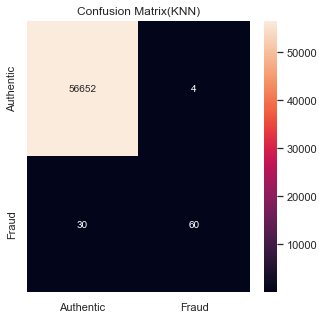

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(standardized_x_train,y_train)
prediction=knn.predict(standardized_x_test)


from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score
acc_knn=accuracy_score(y_test,prediction)
print('Accuracy score :',acc_knn)
f1_score_knn=f1_score(y_test,prediction)
print('F1 score',f1_score_knn)
recall_knn=recall_score(y_test,prediction)
print('Recall:',recall_knn)
precision_knn=precision_score(y_test,prediction)
print('Precision:',precision_knn)
labels=['Authentic','Fraud']
plt.figure(figsize=(5,5))
plt.title("Confusion Matrix(KNN)")
sns.heatmap(confusion_matrix(y_test,prediction),xticklabels=labels,yticklabels=labels,annot=True,fmt='d')
plt.show()

Accuracy score : 0.9986254537764776
F1 score 0.6422018348623854
Recall: 0.7777777777777778
Precision: 0.546875


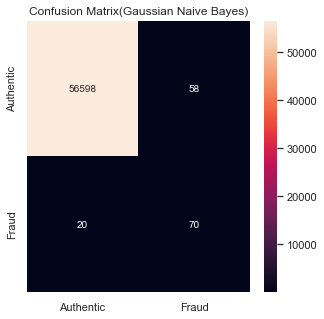

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(standardized_x_train,y_train)
prediction=gnb.predict(standardized_x_test)


from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score
acc_gnb=accuracy_score(y_test,prediction)
print('Accuracy score :',acc_gnb)
f1_score_gnb=f1_score(y_test,prediction)
print('F1 score',f1_score_gnb)
recall_gnb=recall_score(y_test,prediction)
print('Recall:',recall_gnb)
precision_gnb=precision_score(y_test,prediction)
print('Precision:',precision_gnb)
labels=['Authentic','Fraud']
plt.figure(figsize=(5,5))
plt.title("Confusion Matrix(Gaussian Naive Bayes)")
sns.heatmap(confusion_matrix(y_test,prediction),xticklabels=labels,yticklabels=labels,annot=True,fmt='d')
plt.show()

Comparing all the algorithms to determine the best one

In [28]:
accuracy= {'Random Forest':acc_rfc,'Decision Tree':acc_dt,'Logistic Regression':acc_lr,'SVM':acc_svm,'KNN':acc_knn,'Naive Bayes':acc_gnb}
f1={'Random Forest':f1_score_rfc,'Decision Tree':f1_score_dt,'Logistic Regression':f1_score_lr,'SVM':f1_score_svm,'KNN':f1_score_knn,'Naive Bayes':f1_score_gnb} 
precision={'Random Forest':precision_rfc,'Decision Tree':precision_dt,'Logistic Regression':precision_lr,'SVM':precision_svm,'KNN':precision_knn,'Naive Bayes':precision_gnb}
recall={'Random Forest':recall_rfc,'Decision Tree':recall_dt,'Logistic Regression':recall_lr,'SVM':recall_svm,'KNN':recall_knn,'Naive Bayes':recall_gnb}
dict={'Accuracy Score':accuracy,'F1 score':f1,'Precision':precision,'Recall':recall}
eval_metric_comp=pd.DataFrame(dict)
eval_metric_comp
                        
                        
                        
                        

,Accuracy Score,F1 score,Precision,Recall
Random Forest,0.999471,0.805195,0.968750,0.688889
Decision Tree,0.999013,0.678161,0.702381,0.655556
Logistic Regression,0.999436,0.802469,0.902778,0.722222
SVM,0.999507,0.822785,0.955882,0.722222
KNN,0.999401,0.779221,0.937500,0.666667
Naive Bayes,0.998625,0.642202,0.546875,0.777778


# Conclusion:

    We can see that Naive Bayes has the best recall,SVM has the best F1 score and Random Forest           algorithm has the best Accuracy score & Precision 
    
    We can thus conclude that of all the machine learning algorithms used for this particular 
    dataset 'Random Forest' algorithm gives the best overall prediction 
    